# Import Modules and read in data

In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

df = pd.read_csv('https://dataverse.harvard.edu/api/access/datafile/3005330')

In [3]:
df.head()

,StartDate,EndDate,Progress,Finished,consent,Activity length,Visit Frequency,Previous Foundings,Admin Status,other_site_participation,...,Sex,year_born,Marital Status,Residence,Race,Hispanic_or_Latino_origin,Residence Area,Household Income,Employment Status,age
0,2016-08-31 09:37:09,2016-08-31 09:49:17,100,True,Accept,Less than 3 months,I visit Wikia multiple times per day,1.0,No,Yes,...,Male,1993.0,Living with another,Canada,White,No,Rural,"Under $10,000",Student,26
1,2016-08-30 07:39:48,2016-08-30 19:24:48,100,True,Accept,Less than 3 months,Once a month or less,1.0,No,No,...,Female,1998.0,Rather not say,Central America,White,No,Rural,Rather not say,Student,21
2,2016-08-29 08:43:18,2016-08-29 08:56:10,100,True,Accept,Less than 3 months,Once a month or less,1.0,No,No,...,Male,1961.0,Married,USA,White,No,Suburban,"$30,000 - $39,999",Employed Part Time,58
3,2016-08-29 06:59:12,2016-08-29 07:07:55,100,True,Accept,Less than 3 months,I visit Wikia multiple times per day,1.0,No,No,...,Male,1994.0,Single,Europe,White,No,Suburban,Rather not say,Student,25
4,2016-08-29 05:05:53,2016-08-29 05:18:34,100,True,Accept,Less than 3 months,A few times per month,1.0,No,No,...,Male,1989.0,Single,Asia,Asian Indian,No,Urban,Rather not say,Employed Full Time,30


## Add age column

In [2]:
df['age'] = datetime.datetime.now().year - df['year_born'].astype(int)

## Filter outliers (person younger than 0 or older than 100)

In [4]:
df = df[(df['age'] >= 0) & (df['age'] <= 100)]

## Select columns of interest

In [5]:
df_subset = df[["Sex","age"]]
df_subset.head()

,Sex,age
0,Male,26
1,Female,21
2,Male,58
3,Male,25
4,Male,30


## Compute statistics

In [6]:
mn  = df_subset.groupby('Sex')['age'].mean() 
sd  = df_subset.groupby('Sex')['age'].std()
sem = df_subset.groupby('Sex')['age'].sem()

Stats = pd.concat([mn, sd,sem], axis=1)
Stats.columns = ['MEAN','SD','SEM']
Stats

,MEAN,SD,SEM
Sex,,,
Female,27.807692,9.163114,0.898517
Male,31.257143,12.708814,0.960696


## Two df for women and men

In [7]:
##DF for women and men
Male   = df_subset[df_subset['Sex']=='Male']
Female = df_subset[df_subset['Sex']=='Female']

## Boxplot: Displayed are median, 1st and 3rd quartile, range and outliers.

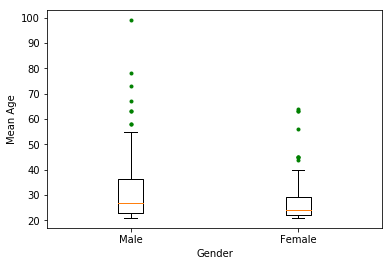

In [8]:
plt.boxplot([Male['age'] , Female['age']],0,'g.')
plt.xlabel('Gender')
plt.ylabel('Mean Age')
plt.xticks([1, 2], ['Male', 'Female'])
plt.show()